In [22]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler


In [23]:
# Load the dataset
file_path = '/content/customer_segmentation_data.csv'
df = pd.read_csv(file_path)

# Display the first few rows of the DataFrame
print(df.head())


   id  age  gender  income  spending_score  membership_years  \
0   1   38  Female   99342              90                 3   
1   2   21  Female   78852              60                 2   
2   3   60  Female  126573              30                 2   
3   4   40   Other   47099              74                 9   
4   5   65  Female  140621              21                 3   

   purchase_frequency preferred_category  last_purchase_amount  
0                  24          Groceries                113.53  
1                  42             Sports                 41.93  
2                  28           Clothing                424.36  
3                   5      Home & Garden                991.93  
4                  25        Electronics                347.08  


In [24]:
# Check for missing values
print(df.isnull().sum())

# Handle missing values if any
df = df.dropna()  # Or use other methods to handle missing data

# Convert categorical variables to numeric if needed
df['gender'] = df['gender'].astype('category').cat.codes
df['preferred_category'] = df['preferred_category'].astype('category').cat.codes

print(df.head())


id                      0
age                     0
gender                  0
income                  0
spending_score          0
membership_years        0
purchase_frequency      0
preferred_category      0
last_purchase_amount    0
dtype: int64
   id  age  gender  income  spending_score  membership_years  \
0   1   38       0   99342              90                 3   
1   2   21       0   78852              60                 2   
2   3   60       0  126573              30                 2   
3   4   40       2   47099              74                 9   
4   5   65       0  140621              21                 3   

   purchase_frequency  preferred_category  last_purchase_amount  
0                  24                   2                113.53  
1                  42                   4                 41.93  
2                  28                   0                424.36  
3                   5                   3                991.93  
4                  25                 

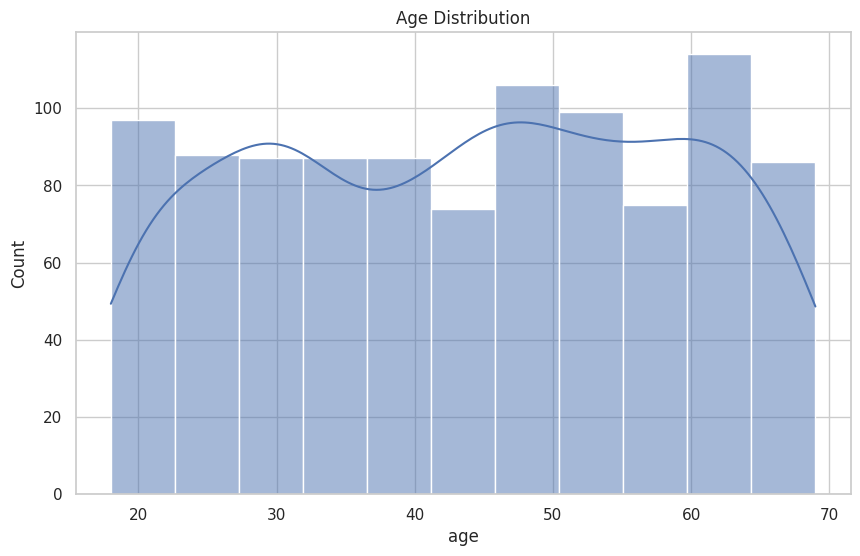

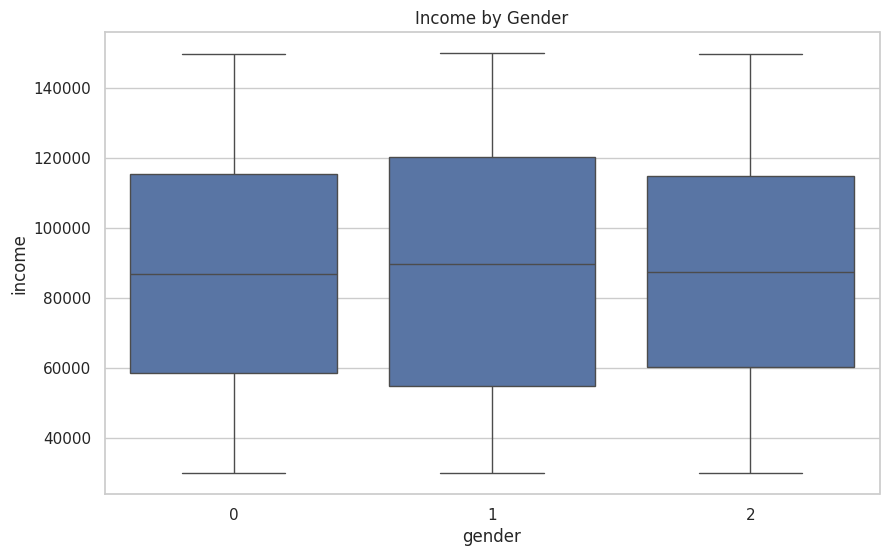

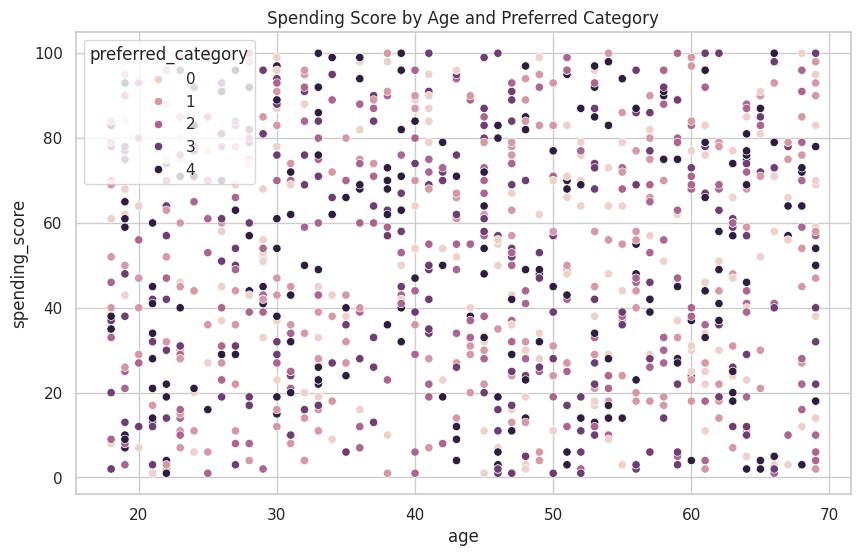

In [25]:
# Age distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['age'], kde=True)
plt.title('Age Distribution')
plt.show()

# Income by gender
plt.figure(figsize=(10, 6))
sns.boxplot(x='gender', y='income', data=df)
plt.title('Income by Gender')
plt.show()

# Spending score by age and preferred category
plt.figure(figsize=(10, 6))
sns.scatterplot(x='age', y='spending_score', hue='preferred_category', data=df)
plt.title('Spending Score by Age and Preferred Category')
plt.show()


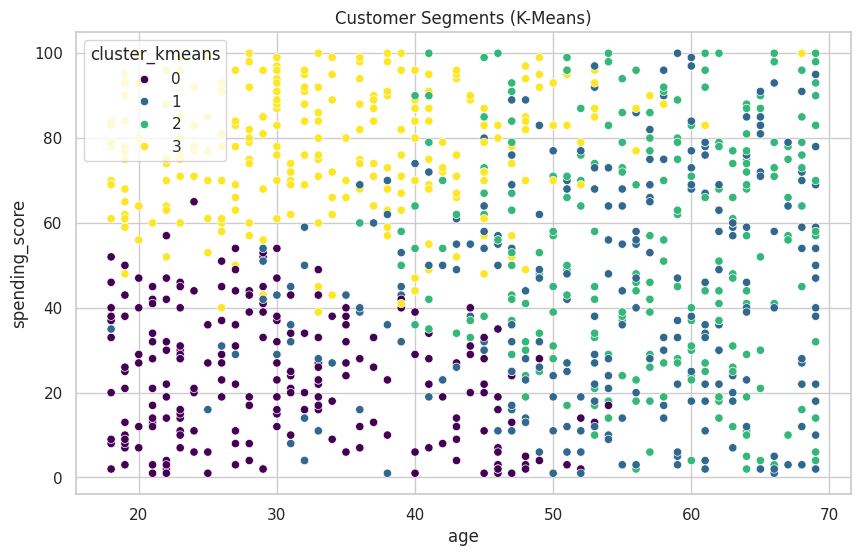

In [26]:
# Standardize the data
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df[['age', 'income', 'spending_score', 'membership_years', 'purchase_frequency', 'last_purchase_amount']])

# Apply K-Means clustering with explicit n_init
kmeans = KMeans(n_clusters=4, n_init=10, random_state=42)
df['cluster_kmeans'] = kmeans.fit_predict(df_scaled)

# Visualize the clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x='age', y='spending_score', hue='cluster_kmeans', data=df, palette='viridis')
plt.title('Customer Segments (K-Means)')
plt.show()


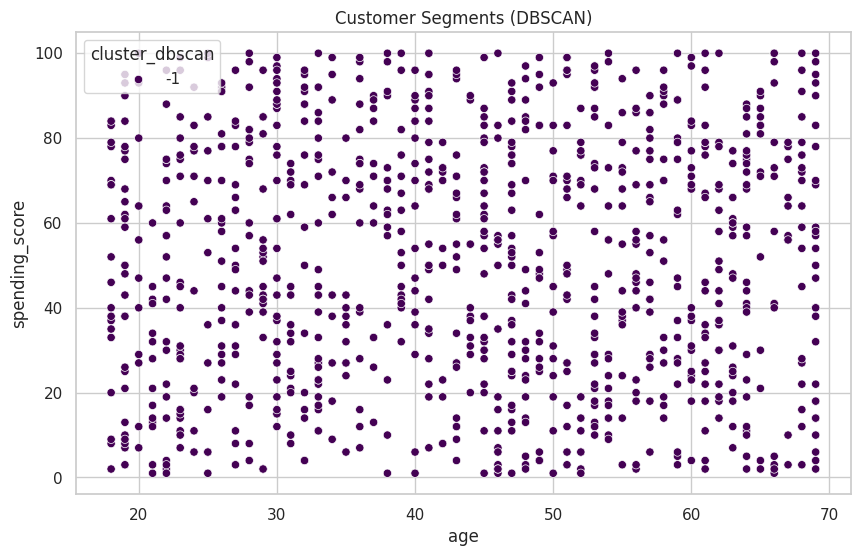

In [27]:
# Apply DBSCAN clustering
dbscan = DBSCAN(eps=0.5, min_samples=5)
df['cluster_dbscan'] = dbscan.fit_predict(df_scaled)

# Visualize the clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x='age', y='spending_score', hue='cluster_dbscan', data=df, palette='viridis')
plt.title('Customer Segments (DBSCAN)')
plt.show()


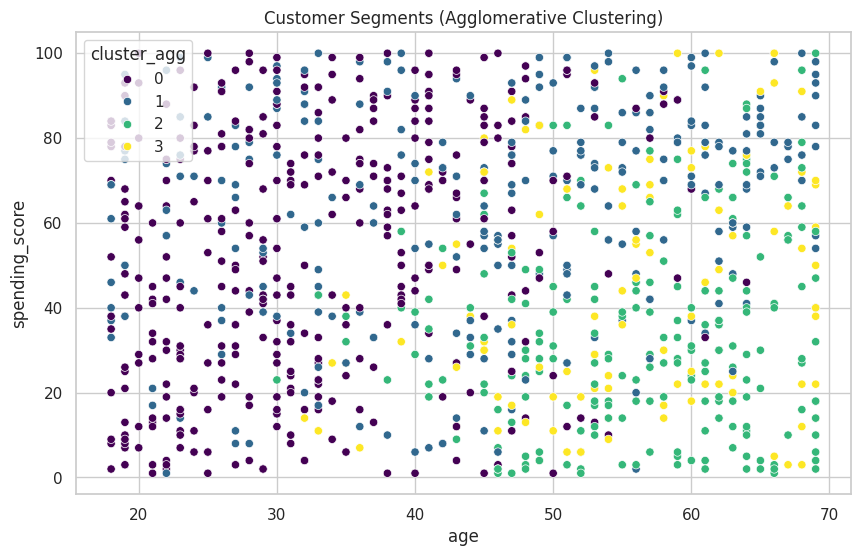

In [28]:
# Apply Agglomerative Clustering
agg = AgglomerativeClustering(n_clusters=4)
df['cluster_agg'] = agg.fit_predict(df_scaled)

# Visualize the clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x='age', y='spending_score', hue='cluster_agg', data=df, palette='viridis')
plt.title('Customer Segments (Agglomerative Clustering)')
plt.show()


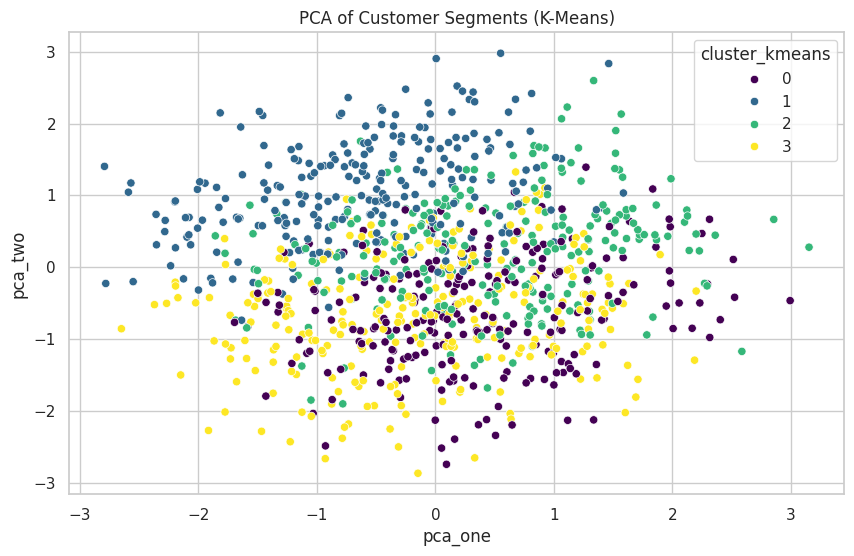

In [29]:
# Apply PCA
pca = PCA(n_components=2)
df_pca = pca.fit_transform(df_scaled)
df['pca_one'] = df_pca[:, 0]
df['pca_two'] = df_pca[:, 1]

# Visualize PCA components
plt.figure(figsize=(10, 6))
sns.scatterplot(x='pca_one', y='pca_two', hue='cluster_kmeans', data=df, palette='viridis')
plt.title('PCA of Customer Segments (K-Means)')
plt.show()


In [30]:
# Analyze clusters
cluster_summary = df.groupby('cluster_kmeans').mean()
print(cluster_summary)

# Recommendations based on clusters
for cluster in cluster_summary.index:
    print(f"Cluster {cluster}:")
    print(f"  Average Age: {cluster_summary.loc[cluster, 'age']}")
    print(f"  Average Income: {cluster_summary.loc[cluster, 'income']}")
    print(f"  Average Spending Score: {cluster_summary.loc[cluster, 'spending_score']}")
    print(f"  Recommended Strategy: {'Provide discounts and offers' if cluster_summary.loc[cluster, 'spending_score'] < 50 else 'Offer premium products and services'}")


                        id        age    gender         income  \
cluster_kmeans                                                   
0               501.321739  30.669565  1.013043   98862.330435   
1               518.334630  53.264591  1.116732   55591.821012   
2               504.741935  56.741935  0.979839  121045.322581   
3               478.520755  33.841509  0.935849   80966.513208   

                spending_score  membership_years  purchase_frequency  \
cluster_kmeans                                                         
0                    23.839130          5.404348           28.386957   
1                    43.319066          5.661479           25.762646   
2                    54.358871          5.112903           25.455645   
3                    77.690566          5.671698           26.916981   

                preferred_category  last_purchase_amount  cluster_dbscan  \
cluster_kmeans                                                             
0                 